In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Test3_Full_Original.csv',
            delimiter=',', names=['x', 'y', 'Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 'UVIC_Eduroam1', 'UVIC_Eduroam2', 'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])

df.head()

,x,y,Magicv2,localization4,localizationlab,Magicv2_5g,UVIC_Eduroam1,UVIC_Eduroam2,localization3,localization_lab5g,localization1,localization4_5g,UVIC_Eduroam3,localization2,localization3_5g,UVIC_Eduroam4,localization1_5g
0,5.0,-11.75,-56,-45,-66,-66,-100,-100,-41,-79,-76,-73,-100,-75,-61,-100,-90
1,5.0,-11.75,-56,-45,-63,-65,-100,-100,-41,-78,-73,-68,-100,-75,-63,-100,-95
2,5.0,-11.75,-55,-48,-59,-67,-100,-100,-42,-78,-73,-67,-100,-73,-59,-100,-93
3,5.0,-11.75,-55,-48,-59,-70,-100,-100,-43,-78,-73,-68,-100,-73,-56,-100,-95
4,5.0,-11.75,-55,-46,-63,-70,-100,-100,-39,-80,-73,-70,-100,-73,-57,-100,-95


In [4]:
df = df[['Magicv2', 'localization4', 'localizationlab', 'Magicv2_5g', 
       'localization3', 'localization_lab5g', 'localization1', 'localization4_5g', 'localization2',
       'localization3_5g', 'localization1_5g']]
df.head()

,Magicv2,localization4,localizationlab,Magicv2_5g,localization3,localization_lab5g,localization1,localization4_5g,localization2,localization3_5g,localization1_5g
0,-56,-45,-66,-66,-41,-79,-76,-73,-75,-61,-90
1,-56,-45,-63,-65,-41,-78,-73,-68,-75,-63,-95
2,-55,-48,-59,-67,-42,-78,-73,-67,-73,-59,-93
3,-55,-48,-59,-70,-43,-78,-73,-68,-73,-56,-95
4,-55,-46,-63,-70,-39,-80,-73,-70,-73,-57,-95


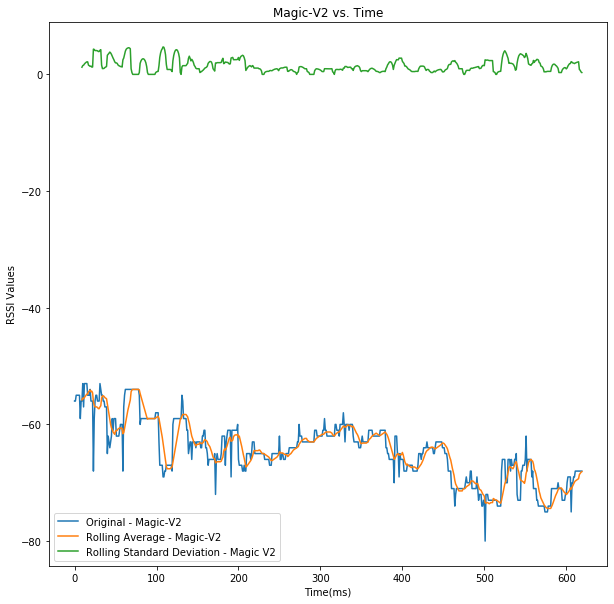

In [5]:
#Blue - Plot representing one of the RSSI over time (1ms time step)
#Orange - Rolling Average representing one of the RSSI over time (1ms time step) - 10 Second moving average
#Green - Rolling Standard Deviation representing one of the RSSI over time (1ms time step) - 10 Second moving average
df['Magicv2'].plot(label='Original - Magic-V2',figsize=(10,10))
df['Magicv2'].rolling(window=10).mean().plot(label='Rolling Average - Magic-V2')
df['Magicv2'].rolling(window=10).std().plot(label='Rolling Standard Deviation - Magic V2')

plt.title('Magic-V2 vs. Time')
plt.legend()
plt.xlabel('Time(ms)')
plt.ylabel('RSSI Values')
plt.show()

In [6]:
RSSIvals = df.iloc[:,:].values.tolist()  #Convert the pandas dataframe to a numpy Array

averages = []  #Create a list to store averages per row
sum = 0        #Sum to track all of the elements in the row

for i in range(len(RSSIvals)):        #Iterates through the columns
    for j in range(len(RSSIvals[0])):
        sum = sum + RSSIvals[i][j]
    averages.append(sum/11)
    sum = 0
    


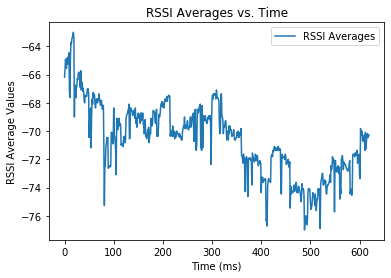

In [7]:
plt.plot(averages, label='RSSI Averages')
plt.title('RSSI Averages vs. Time')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('RSSI Average Values')
plt.show()

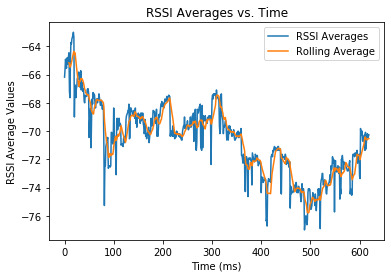

In [10]:
#Convert averages to a dataframe
plt.plot(averages, label='RSSI Averages')

window_size = 10
numbers_series = pd.Series(averages)
numbers_series.rolling(window=10).mean().plot(label='Rolling Average')
#numbers_series.rolling(window=10).std().plot(label='Rolling Standard Deviation') #This is to get the standard dev

plt.title('RSSI Averages vs. Time')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('RSSI Average Values')
plt.show()